In [1]:
import matplotlib.pyplot as plt
from averages import pauli_eigenvectors_average, haar_measure_average, to_bloch
import numpy as np
from qiskit.circuit.library import UGate
from qiskit.quantum_info import DensityMatrix

In [2]:
def plot_bloch_sphere(bloch_vectors):
    """ Helper function to plot vectors on a sphere."""
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    ax.grid(False)
    ax.set_axis_off()
    ax.view_init(30, 45)
    ax.dist = 7

    # Draw the axes (source: https://github.com/matplotlib/matplotlib/issues/13575)
    x, y, z = np.array([[-1.5,0,0], [0,-1.5,0], [0,0,-1.5]])
    u, v, w = np.array([[3,0,0], [0,3,0], [0,0,3]])
    ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.05, color="black", linewidth=0.5)

    ax.text(0, 0, 1.7, r"|0⟩", color="black", fontsize=16)
    ax.text(0, 0, -1.9, r"|1⟩", color="black", fontsize=16)
    ax.text(1.9, 0, 0, r"|+⟩", color="black", fontsize=16)
    ax.text(-1.7, 0, 0, r"|–⟩", color="black", fontsize=16)
    ax.text(0, 1.7, 0, r"|i+⟩", color="black", fontsize=16)
    ax.text(0,-1.9, 0, r"|i–⟩", color="black", fontsize=16)

    ax.scatter(
        bloch_vectors[:,0], bloch_vectors[:,1], bloch_vectors[:, 2], c='#e29d9e', alpha=0.3
    )



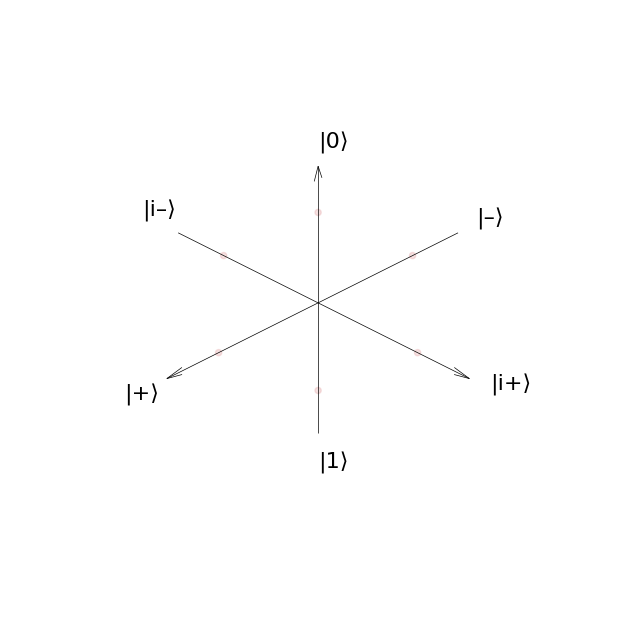

In [3]:
plot_bloch_sphere( np.array([to_bloch(x) for x in pauli_eigenvectors_average()]))

In [4]:
def to_bloch2(rho: DensityMatrix):
    return np.array(
        [
            (rho.data[1, 0] + rho.data[0, 1]).real,
            (rho.data[1, 0] - rho.data[0, 1]).imag,
            (rho.data[0, 0] - rho.data[1, 1]).real,
        ]
    )

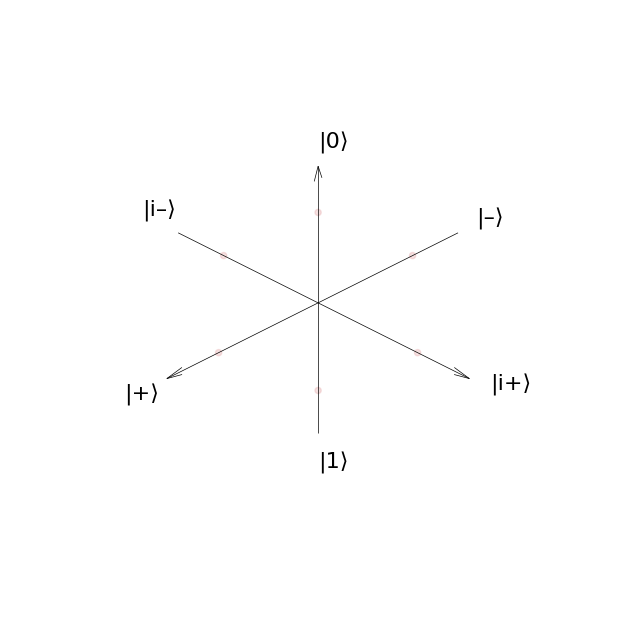

In [7]:
plot_bloch_sphere( np.array([to_bloch2(DensityMatrix.from_label("0").evolve(UGate(a, b, c)).to_operator()) for a, b, c in pauli_eigenvectors_average()]))

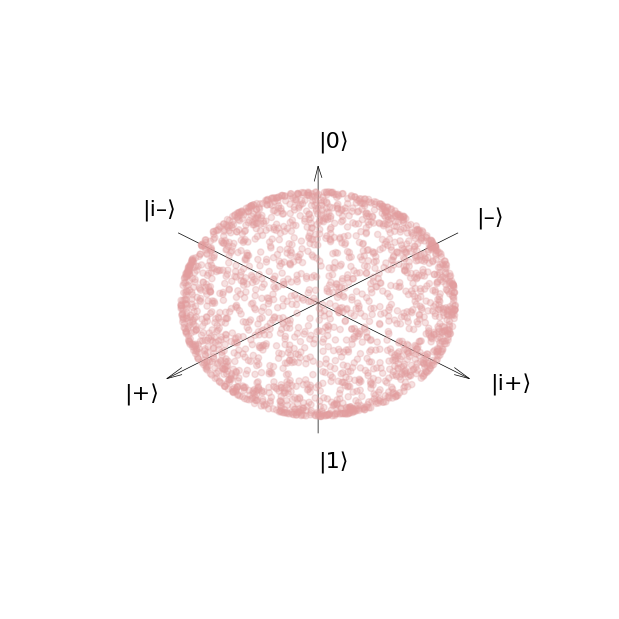

In [5]:
plot_bloch_sphere( np.array([to_bloch(x) for x in haar_measure_average(2000)]))

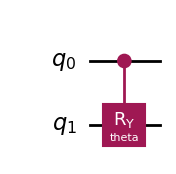

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter, ParameterVector

qc = QuantumCircuit(2)
theta = Parameter('theta')
qc.cry(theta, 0, 1)
qc.draw('mpl')